In [1]:
def insertionsort(arr):
    keyCompare = 0
    for i in range(len(arr)):
        for j in range(i,0,-1):
            keyCompare+=1
            if arr[j-1]>arr[j]:
                arr[j-1],arr[j] = arr[j],arr[j-1]
            else: break
    return keyCompare

In [20]:
def mergesort_insertion(arr,left,right,k):
    if (right-left <= k):
        return insertionsort(arr)
    mid=int((left+right)/2)
    return mergesort_insertion(arr,left,mid,k)+mergesort_insertion(arr,mid+1,right,k)+merge(arr,left,right,mid)

def mergesort_original(arr,left,right):
    if (left>=right): return 0
    mid=int((left+right)/2)
    return mergesort_original(arr,left,mid)+mergesort_original(arr,mid+1,right)+merge(arr,left,right,mid)
    
def merge(arr,left,right,mid):
    keyCompare = 0
    L = arr[left:mid+1]
    R = arr[mid+1:right+1]
    l=0; r=0
    while (l<len(L) and r<len(R)):
        keyCompare+=1
        if L[l]<R[r]:
            arr[left]=L[l]
            l+=1
        else:
            arr[left]=R[r]
            r+=1
        left+=1
    if (l<len(L)):
        arr=L[l:]
    if (r<len(R)):
        arr=R[r:]
    return keyCompare

In [19]:
r = list(random.randint(1000, size=(100)))
mergesort_insertion(r, 0, 100, 10)
print(r)

[13, 17, 18, 25, 32, 47, 57, 57, 62, 70, 75, 84, 84, 85, 95, 107, 114, 124, 132, 134, 140, 141, 144, 156, 178, 190, 208, 218, 243, 256, 263, 268, 316, 322, 362, 365, 369, 379, 388, 395, 417, 419, 423, 424, 446, 459, 497, 505, 512, 527, 532, 536, 548, 559, 560, 565, 582, 584, 588, 651, 697, 706, 706, 717, 725, 754, 755, 759, 761, 766, 778, 787, 792, 822, 830, 832, 841, 843, 843, 855, 855, 882, 882, 893, 901, 902, 904, 905, 906, 911, 912, 921, 927, 937, 951, 961, 980, 985, 986, 995]


In [5]:
def mergeSortT(arr,k):
    if (len(arr) <= k):
        return insertionsort(arr)
    keyCompare = 0
    mid = len(arr)//2
    L = arr[:mid]
    R = arr[mid:]
    keyCompare += mergeSortT(L,k)
    keyCompare += mergeSortT(R,k)
    i = j = k = 0
    
    while i < len(L) and j < len(R):
        keyCompare +=1
        if L[i] < R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
    # Checking if any element was left
    while i < len(L):
        arr[k] = L[i]
        i += 1
        k += 1
    while j < len(R):
        arr[k] = R[j]
        j += 1
        k += 1
    return keyCompare

In [3]:
import time
from random import shuffle
from numpy import random
import matplotlib.pyplot as plt
import math

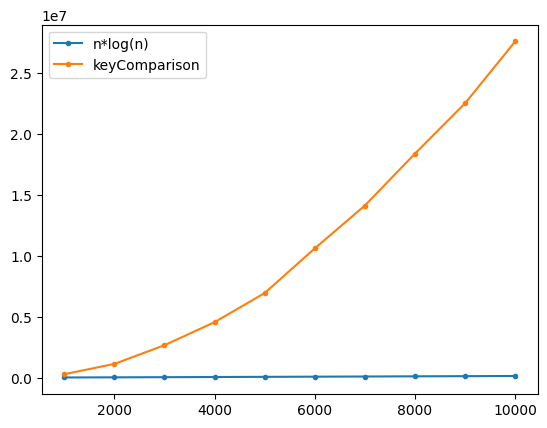

In [21]:
timeComplexity = []
arr = list(random.randint(1000, size=(1000)))

# We try to fix k at 2 first
k = 43
for i in range(0, 10):
    keyCompare=0
    keyCompare = mergesort_insertion(arr,0,len(arr)-1,k)
    timeComplexity.append((1000+i*1000, keyCompare))
    arr+=list(random.randint(1000, size=1000))
    shuffle(arr)

x = [i[0] for i in timeComplexity]
y1 = [i*math.log(i,2) for i in x]
y2 = [i[1] for i in timeComplexity]
plt.plot(x, y1, label = "n*log(n)", marker=".")
plt.plot(x, y2, label = "keyComparison", marker=".")
plt.legend()

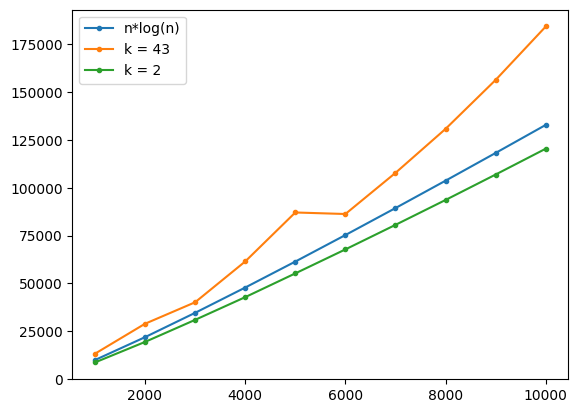

In [10]:
timeComplexity = []
arr = list(random.randint(1000, size=(1000)))

# We try to fix k at 2 first
k = 2
for i in range(0, 10):
    keyCompare=0
    keyCompare = mergeSortT(arr,k)
    timeComplexity.append((1000+i*1000, keyCompare))
    arr+=list(random.randint(1000, size=1000))
    shuffle(arr)

x = [i[0] for i in timeComplexity]
y1 = [i*math.log(i,2) for i in x]
y3 = [i[1] for i in timeComplexity]
plt.plot(x, y1, label = "n*log(n)", marker=".")
plt.plot(x, y2, label = "k = 43", marker=".")
plt.plot(x, y3, label = "k = 2", marker=".")
plt.legend()

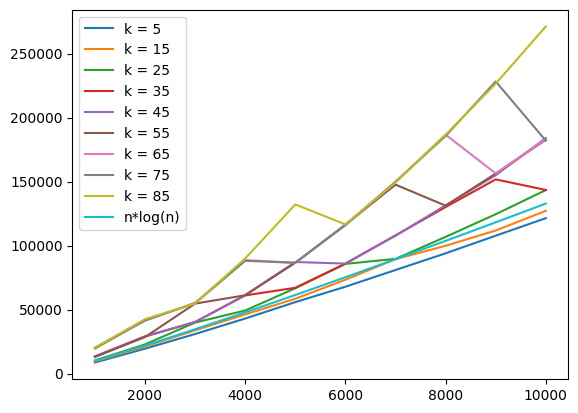

In [7]:
for i in range (5, 90, 10):
    k=i
    arr=list(random.randint(1000, size=(1000)))
    timeComplexity = []

    for i in range(0, 10):
        keyCompare = 0
        keyCompare = mergeSortT(arr,k)
        timeComplexity.append((1000+i*1000, keyCompare))
        arr+=list(random.randint(1000, size=(1000)))
        shuffle(arr)

    x = [i[0] for i in timeComplexity]
    y2 = [i[1] for i in timeComplexity]
    plt.plot(x, y2, label = "k = {}".format(k))

y1 = [i*math.log(i,2) for i in x]
plt.plot(x, y1, label = "n*log(n)")
plt.legend()

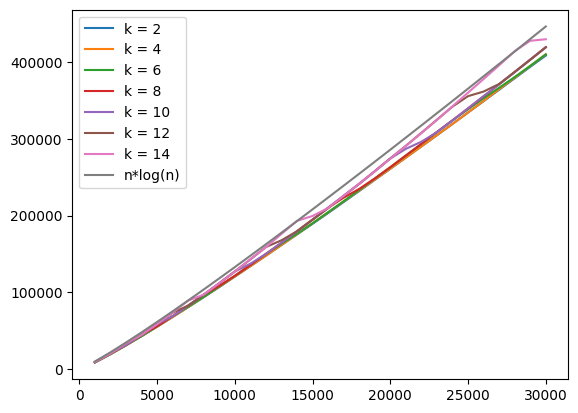

In [8]:
for i in range (2, 15, 2):
    k=i
    arr=list(random.randint(1000, size=(1000)))
    timeComplexity = []

    for i in range(0, 30):
        keyCompare = 0
        keyCompare = mergeSortT(arr,k)
        timeComplexity.append((1000+i*1000, keyCompare))
        arr+=list(random.randint(1000, size=(1000)))
        shuffle(arr)

    x = [i[0] for i in timeComplexity]
    y2 = [i[1] for i in timeComplexity]
    plt.plot(x, y2, label = "k = {}".format(k))

y1 = [i*math.log(i,2) for i in x]
plt.plot(x, y1, label = "n*log(n)")
plt.legend()

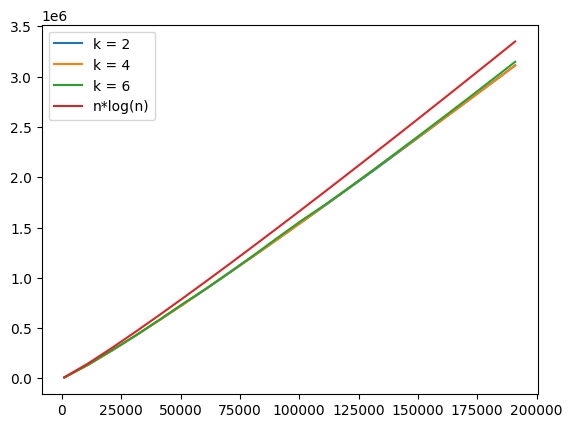

In [13]:
for i in range (2, 7, 2):
    k=i
    arr=list(random.randint(1000, size=(1000)))
    timeComplexity = []

    for i in range(0, 20):
        keyCompare = 0
        keyCompare = mergeSortT(arr,k)
        timeComplexity.append((1000+i*10000, keyCompare))
        arr+=list(random.randint(1000, size=(10000)))
        shuffle(arr)

    x = [i[0] for i in timeComplexity]
    y2 = [i[1] for i in timeComplexity]
    plt.plot(x, y2, label = "k = {}".format(k))

y1 = [i*math.log(i,2) for i in x]
plt.plot(x, y1, label = "n*log(n)")
plt.legend()

In [5]:
t=time.time()
k=4
arr=list(random.randint(100000, size=(10000000)))
keyCompare_modified = 0
keyCompare_modified = mergeSortT(arr,k)
print("Number of key comparison is: {}".format(keyCompare_modified))
print("Taken is: {}".format(time.time() - t))

Number of key comparison is: 220225597
Taken is: 63.47838020324707


In [5]:
t=time.time()
k=4
arr=list(random.randint(100000, size=(10000000)))
keyCompare_modifiedmy = 0
keyCompare_modifiedmy = mergesort_insertion(arr,0,len(arr)-1,k)
print("Number of key comparison is: {}".format(keyCompare_modifiedmy))
print("Taken is: {}".format(time.time() - t))

KeyboardInterrupt: 

In [29]:
t=time.time()
k=4
arr=list(random.randint(1000000, size=(10000000)))
keyCompare_unmodified = 0
keyCompare_unmodified = mergesort_original(arr,0,len(arr)-1)
print("Number of key comparison is: {}".format(keyCompare_unmodified))
print("Taken is: {}".format(time.time() - t))

Number of key comparison is: 220042889
Taken is: 74.68854689598083
